In [25]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [26]:
data = yf.download("^GSPC", start="2020-01-01", end="2024-12-31", auto_adjust=True)
data = data[['Close']].copy()
data['MA20'] = data['Close'].rolling(window=20).mean()
data.dropna(inplace=True)


[*********************100%***********************]  1 of 1 completed


In [27]:
close = data['Close'].squeeze()
ma20 = data['MA20'].squeeze()
data['Position'] = (close < ma20).astype(int)


In [28]:
data['Return'] = data['Close'].pct_change()
data['Strategy_Return'] = data['Position'].shift(1) * data['Return']

data['Signal'] = data['Position'].diff().abs()
transaction_cost = 0.001
data['Strategy_Return_Net'] = data['Strategy_Return'] - data['Signal'] * transaction_cost


In [29]:
data['Buy_Hold'] = (1 + data['Return']).cumprod()
data['Strategy'] = (1 + data['Strategy_Return']).cumprod()
data['Strategy_Net'] = (1 + data['Strategy_Return_Net']).cumprod()


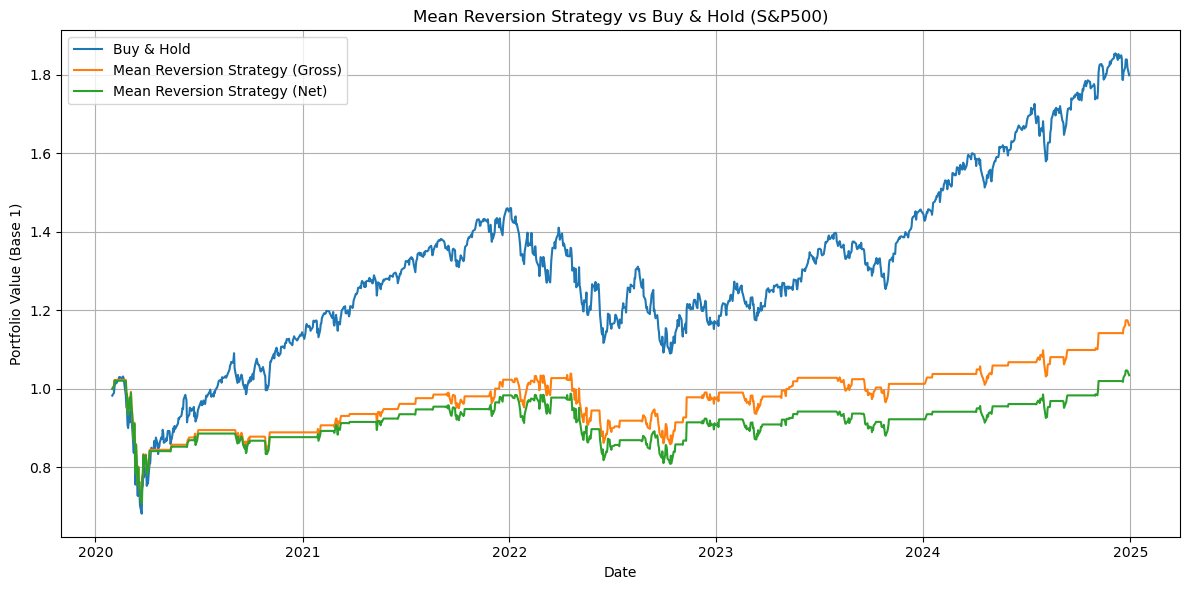

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(data['Buy_Hold'], label='Buy & Hold')
plt.plot(data['Strategy'], label='Mean Reversion Strategy (Gross)')
plt.plot(data['Strategy_Net'], label='Mean Reversion Strategy (Net)')

plt.title('Mean Reversion Strategy vs Buy & Hold (S&P500)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (Base 1)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
